In [58]:
import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hellocomsol import hellodata, arg_and_path

In [3]:
df = pd.read_csv('100nm_grided_new_df.csv')
df.head()

,t,x,y,U,sr,thr,fn,fg
0,0.0,0.000005,5.000000e-07,0.006851,14438.761,-2.215876e-35,1.951681e-15,0.0045
1,0.1,0.000005,5.000000e-07,0.006842,14419.346,4.061563e-35,-1.539766e-34,0.0045
2,0.2,0.000005,5.000000e-07,0.006842,14419.346,1.952872e-33,-2.338661e-26,0.0045
3,0.3,0.000005,5.000000e-07,0.006842,14419.346,3.842124e-35,-7.896191e-25,0.0045
4,0.4,0.000005,5.000000e-07,0.006842,14419.346,4.026753e-35,2.815794e-23,0.0045


In [5]:
df[(df['x'] > 4e-6) & (df['x'] < 6e-6)]['x'].unique()

array([5.e-06])

In [57]:
cut_line_step = df[(df.x > 3e-4) & (df.x < 9.5e-4)].x.unique()[::5]
cut_line_step

array([0.000305, 0.000355, 0.000405, 0.000455, 0.000505, 0.000555,
       0.000605, 0.000655, 0.000705, 0.000755, 0.000805, 0.000855,
       0.000905])

In [59]:
I1 = list()
for cut in tqdm.tqdm(cut_line_step):
    at_x = df[(df['x'] == cut) & (df['t'] == 10)]
    x = at_x.y
    y = at_x.fn
    I1.append(simps(y, x))

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 35.27it/s]


In [66]:
np.mean(I1)

3.53088557938652e-10

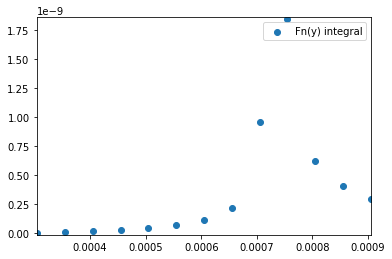

In [67]:
plt.scatter(cut_line_step, I1, label="Fn(y) integral")
plt.xlim(cut_line_step.min() - 0.05 * x.mean(), cut_line_step.max() + 0.05 * x.mean())
plt.ylim(np.min(I1) - 0.05 * np.mean(I1), np.max(I1) + 0.05 * np.mean(I1))
plt.legend()
plt.show()